In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koodikirjasto as kk
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

TJTS490 Tietokantajärjestelmät ja data-analytiikka
Harjoitustyö
Susanna Lähde & Aatu Laitinen

Tässä työssä tutkitaan ajoneuvorekisterin dataa. 
Katsotaan millaista tietoa data pitää sisällään:

tähän jotain data explorationia jeejee
esim tutkitaan että millaisia arvoja kolumnit sisältää, onko nulleja (ja mihin ne vaikuttaa) yms yms

Ajatellaan, että olemme autojen jälleenmyyjä ja vaihtoautokauppa. Toimimme Suomen suurimmissa kaupunkikeskuksissa.
Meidän liiketoiminnan jatkuuvuden kannalta tärkeimmät tutkimushypoteesit voisivat olla:
1. Markkinatrendit
2. Alueelliset erot
3. ..?

# Markkinatrendit
Tutkitaan ensin markkinatrendejä

In [52]:
df = kk.hybridiautot_luokittain('M1', 2012, 2016)

<connection object at 0x00000135F6462DF0; dsn: 'user=postgres password=xxx dbname=VehicleRegisterDatabase host=192.168.0.15', closed: 0>
Cursor created successfully


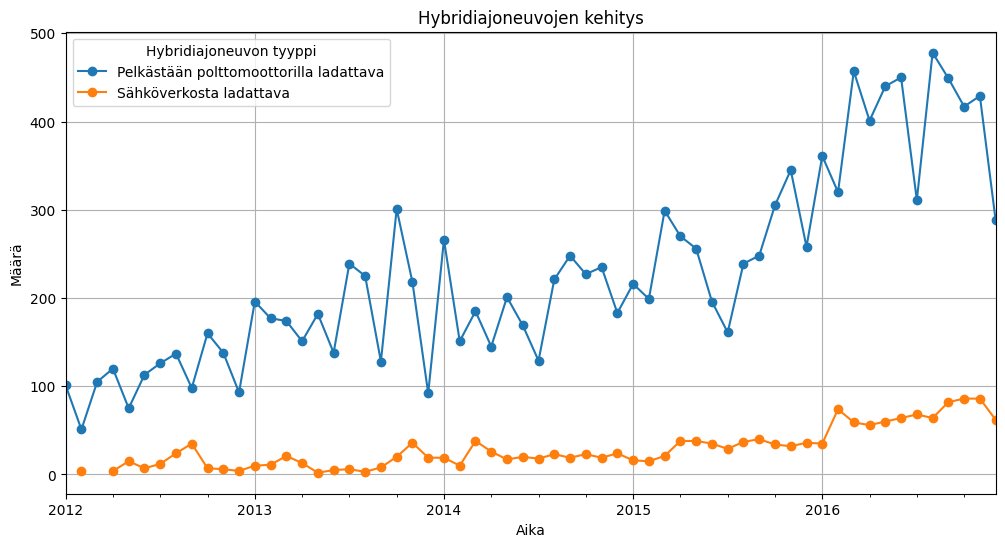

In [42]:
df['date'] = pd.to_datetime(df['vuosi'].astype(str) + '-' + df['kuukausi'].astype(str), format='%Y-%m')
condition = df['hybridityyppi'] == 'Ei määritelty'
df = df[~condition]
df_pivot = df.pivot(index='date', columns='hybridityyppi', values='maara')

fig, ax = plt.subplots(figsize=(12, 6))
df_pivot.plot(ax=ax, marker='o')
plt.title('Hybridiajoneuvojen määrän kehitys')
plt.xlabel('Aika')
plt.ylabel('Määrä')
plt.legend(title='Hybridiajoneuvon tyyppi')
plt.grid(True)
plt.show()


In [51]:
df['date'] = pd.to_datetime(df['vuosi'].astype(str) + '-' + df['kuukausi'].astype(str), format='%Y-%m')
condition = df['hybridityyppi'] == 'Ei määritelty'
df = df[~condition]
df_pivot = df.pivot(index='date', columns='hybridityyppi', values='maara')
print(df_pivot)
fig, ax1 = plt.subplots(figsize=(12, 6))

df_pivot.plot(ax=ax1, y='Pelkästään polttomoottorilla ladattava', marker='o', label='Pelkästään polttomoottorilla ladattava')
ax1.set_title('Hybridiajoneuvojen kehitys')
ax1.set_xlabel('Aika')
ax1.set_ylabel('Määrä - Pelkästään polttomoottorilla ladattava')
ax1.legend(title='Hybridiajoneuvon tyyppi')

ax2 = ax1.twinx()
ax2.set_ylabel('Määrä - Sähköverkosta ladattava')  # Replace with your second y-axis label


df_pivot.plot(ax=ax2, y='Sähköverkosta ladattava', marker='s', linestyle='--', label='Sähköverkosta ladattava', color="pink")
plt.grid(True)
plt.show()

KeyError: 'vuosi'

In [44]:
df = kk.ensirekisteroinnit_vuosittain(2022, 2017, 'merkki')

<connection object at 0x00000135F67F6DF0; dsn: 'user=postgres password=xxx dbname=VehicleRegisterDatabase host=192.168.0.15', closed: 0>
Cursor created successfully
        merkki  2017  2018  2019  2020  2021  2022
0        ADRIA     1     1     0     0     0     1
1   ALFA ROMEO   122    73    35    38    47    36
..         ...   ...   ...   ...   ...   ...   ...
79       VOLVO  8903  9200  9178  7688  7787  6708
80   WEINSBERG     1     0     0     0     0     0

[81 rows x 7 columns]


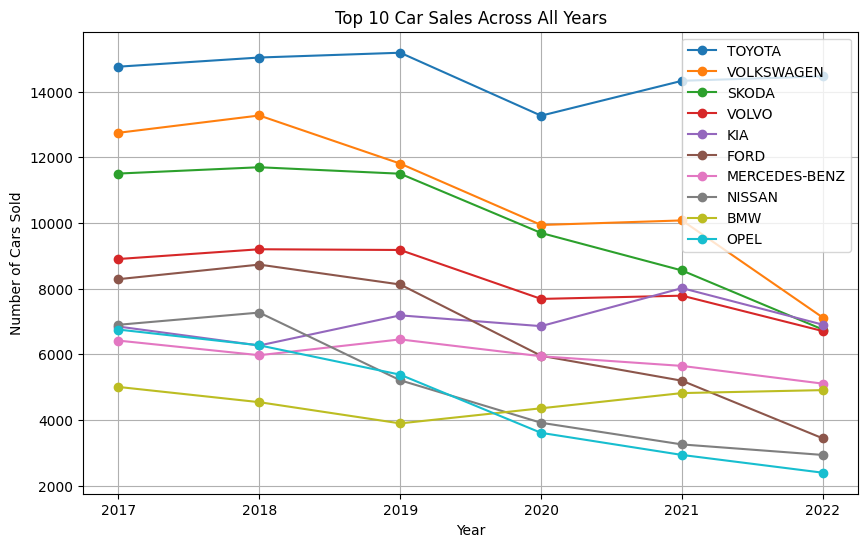

In [45]:
df['Total'] = df[df.columns[1:]].sum(axis=1)
df_sorted = df.sort_values(by='Total', ascending=False).head(10)
plt.figure(figsize=(10, 6))
for index, row in df_sorted.iterrows():
    plt.plot(df.columns[1:-1], row[1:-1], marker='o', label=row['merkki'])
plt.title('10 myydyintä automerkkiä')
plt.xlabel('Vuosi')
plt.ylabel('Myytyjen autojen määrä')
plt.legend()
plt.grid(True)
plt.show()

Visualisoidaan myös suhteellista muutosta, jolloin on helpompi nähdä yksittäisten merkkien trendit

In [47]:
df_sorted
merkit = df_sorted["merkki"].values

df_pc_changes = df_sorted.drop(columns=["merkki", "Total"]).transpose().pct_change() * 100

df_pc_changes = df_pc_changes.transpose()
df_pc_changes["merkki"]= merkit

print(df_pc_changes)


    2017      2018       2019       2020       2021       2022      merkki
75   NaN  1.890372   0.970874 -12.625132   8.004824   0.949124      TOYOTA
78   NaN  4.134630 -11.037444 -15.828252   1.398531 -29.370907  VOLKSWAGEN
..   ...       ...        ...        ...        ...        ...         ...
5    NaN -9.265176 -14.216549  11.800924  10.624140   1.866833         BMW
57   NaN -7.105848 -14.247012 -32.912098 -18.642659 -18.420157        OPEL

[10 rows x 7 columns]


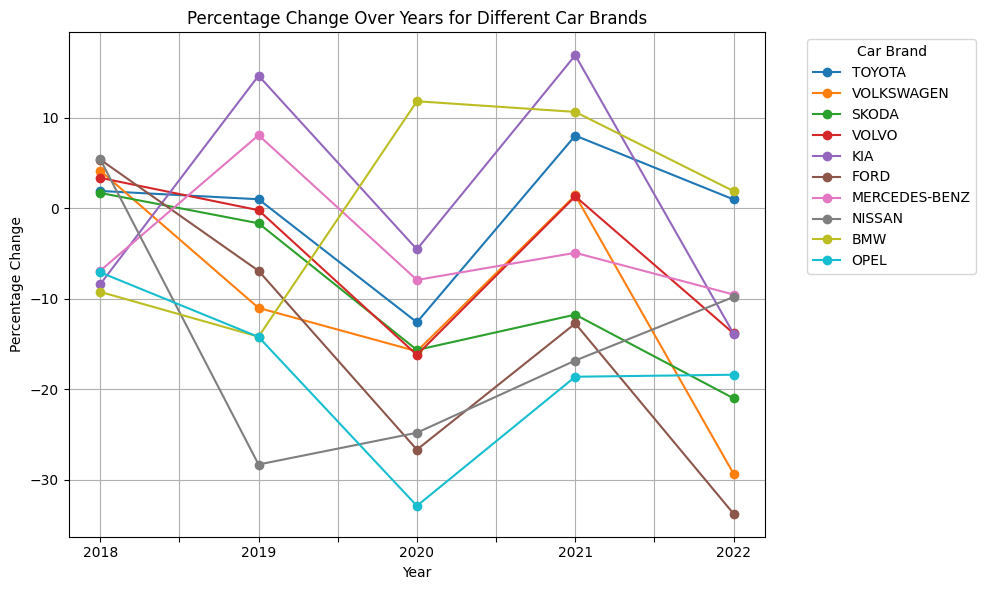

In [48]:
# Set the 'merkki' column as the index (assuming it represents the categories)
df_pc_changes.set_index('merkki', inplace=True)

# Transpose the DataFrame for easier plotting
df_transposed = df_pc_changes.transpose()

# Plot the data
plt.figure(figsize=(10, 6))
df_transposed.plot(marker='o', linestyle='-', ax=plt.gca())
plt.title('Percentage Change Over Years for Different Car Brands')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.legend(title='Car Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [49]:
df = kk.ensirekisteroinnit_vuosittain(2022, 2017, 'merkki')

df = df[df["merkki"] == "VOLVO"]
print(df)
df.drop(columns="merkki",inplace=True) # Toisaalta tän vois tehdä sillä vanhalla datalla ja sit tällä datalla katsoa, miten todellisuudessa meni
print(df)

<connection object at 0x00000135F67F7CD0; dsn: 'user=postgres password=xxx dbname=VehicleRegisterDatabase host=192.168.0.15', closed: 0>
Cursor created successfully
        merkki  2017  2018  2019  2020  2021  2022
0        ADRIA     1     1     0     0     0     1
1   ALFA ROMEO   122    73    35    38    47    36
..         ...   ...   ...   ...   ...   ...   ...
79       VOLVO  8903  9200  9178  7688  7787  6708
80   WEINSBERG     1     0     0     0     0     0

[81 rows x 7 columns]
   merkki  2017  2018  2019  2020  2021  2022
79  VOLVO  8903  9200  9178  7688  7787  6708
    2017  2018  2019  2020  2021  2022
79  8903  9200  9178  7688  7787  6708


In [50]:
#df = df.transpose()
df
#df["määrä"] = df[79]
df

,2017,2018,2019,2020,2021,2022
79,8903,9200,9178,7688,7787,6708


<Axes: >

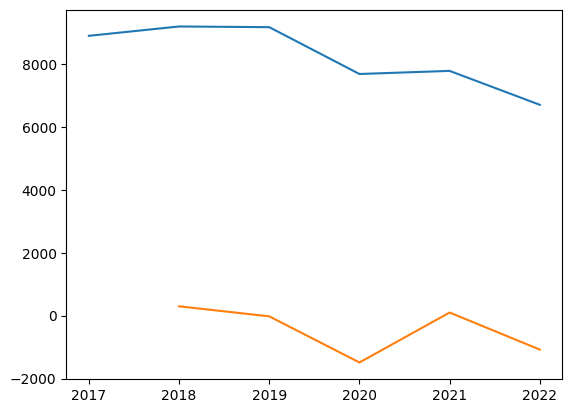

In [19]:
df["määrä"].plot()
df['erotus'] = df['määrä'].diff()
df['erotus'].plot()

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Generate a sample time series data (replace this with your own time series data)
np.random.seed(42)

# Plot the time series data
plt.plot(df['Value'])
plt.title('Original Time Series Data')
plt.show()

# Check for stationarity using the Augmented Dickey-Fuller test
result = adfuller(df['Value'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# If the p-value is greater than a significance level (e.g., 0.05), the series is not stationary.
# You may need to difference the series to make it stationary.

# Differencing the time series
df['Value_diff'] = df['Value'].diff().dropna()

# Plot the differenced time series data
plt.plot(df['Value_diff'])
plt.title('Differenced Time Series Data')
plt.show()

# Check for stationarity again after differencing
result_diff = adfuller(df['Value_diff'])
print('ADF Statistic (after differencing):', result_diff[0])
print('p-value (after differencing):', result_diff[1])
print('Critical Values (after differencing):', result_diff[4])

# Plot the ACF and PACF to help determine the order of ARIMA model
plot_acf(df['Value_diff'], lags=20)
plt.title('Autocorrelation Function (ACF)')
plt.show()

plot_pacf(df['Value_diff'], lags=20)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# Fit the ARIMA model
order = (1, 1, 1)  # Replace with the appropriate order determined from ACF and PACF plots
model = ARIMA(df['Value'], order=order)
results = model.fit()

# Print model summary
print(results.summary())

# Plot the predicted values against the original time series data
plt.plot(df['Value'], label='Original')
plt.plot(results.fittedvalues, color='red', label='Fitted')
plt.title('ARIMA Model Fit')
plt.legend()
plt.show()

<connection object at 0x0000016DC1A00480; dsn: 'user=postgres password=xxx dbname=VehicleRegisterDatabase host=192.168.0.15', closed: 0>
Cursor created successfully
        merkki  2017  2018  2019  2020  2021  2022
0        ADRIA     1     1     0     0     0     1
1   ALFA ROMEO   122    73    35    38    47    36
..         ...   ...   ...   ...   ...   ...   ...
79       VOLVO  8903  9200  9178  7688  7787  6708
80   WEINSBERG     1     0     0     0     0     0

[81 rows x 7 columns]


In [21]:
# Create a sample DataFrame
data = {'A': [10, 15, 20, 25, 30], 'B': [5, 10, 15, 20, 25]}
df = pd.DataFrame(data)
print(df)
# Calculate the percentage change for each column
percentage_change = df.pct_change()

# Display the result
print(percentage_change)

    A   B
0  10   5
1  15  10
2  20  15
3  25  20
4  30  25
          A         B
0       NaN       NaN
1  0.500000  1.000000
2  0.333333  0.500000
3  0.250000  0.333333
4  0.200000  0.250000


In [ ]:
vuodet = df.columns[1:-1][::-1]
merkit = df_sorted["merkki"].values
print(merkit)

for merkki in merkit:
    df_slice = df[df["merkki"] == merkki]
    print(df_slice)

In [63]:
for brands, values in df_sorted.items():
    for i in range(len(df_sorted.columns[1:-1][::-1]) - 1):
        values = df_sorted[df_sorted["merkki"] == values[i]]
        old_value = values[i + 1] # value in the previous year
        new_value = values[i]  # value in the current year
        print(new_value)
        rate_of_change = ((int(new_value) - int(old_value)) / int(old_value)) * 100

        print(f"{brand} ({years[i + 1]}-{years[i]}): {rate_of_change:.2f}%")

KeyError: 0

# Alueelliset erot

In [13]:
df = kk.ensirekisteroinnit_kunnittain_ajoneuvoluokassa("01.01.2010", "01.01.2016", "M1", "Helsinki",False)
df = df.iloc[:15]


<connection object at 0x00000135F6462020; dsn: 'user=postgres password=xxx dbname=VehicleRegisterDatabase host=192.168.0.15', closed: 0>
Cursor created successfully


,Merkki,Määrä
0,Volkswagen,7218
1,Toyota,5017
...,...,...
13,Peugeot,1295
14,Honda,1187


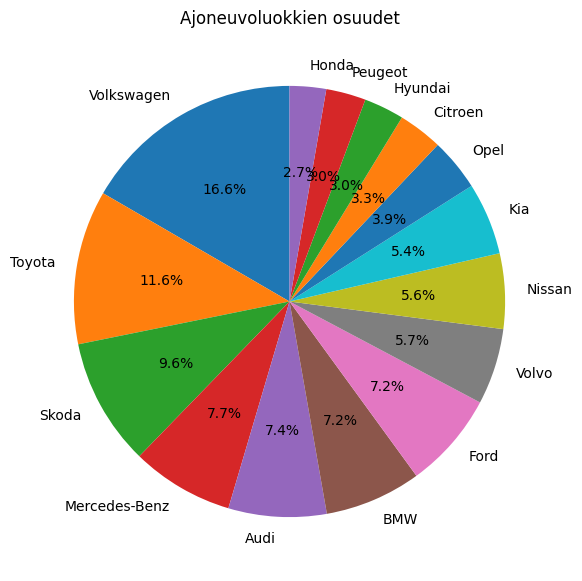

In [20]:
# Create a pie chart with adjusted figure size
fig, ax = plt.subplots(figsize=(13, 7))
ax.pie(df["Määrä"], labels=df["Merkki"].values, autopct='%1.1f%%', startangle=90)

# Customize the plot
ax.set_title('Ajoneuvoluokkien osuudet')

# Show the plot
plt.show()



<Figure size 1500x800 with 0 Axes>

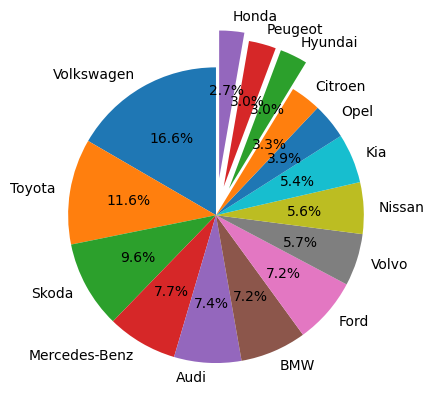

In [32]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(15, 8))

# Create a pie chart with exploded slices
explode = (0, 0, 0, 0, 0, 0, 0, 0,0 ,0, 0, 0, 0.2, 0.2 ,0.25)  # Adjust the explode values as needed
fig, ax = plt.subplots()
ax.pie(df["Määrä"], labels=df["Merkki"].values, autopct='%1.1f%%', startangle=90, explode=explode)

# Customize the plot
#ax.set_title('Ajoneuvoluokkien osuudet')

# Show the plot
plt.show()


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

<Figure size 1500x800 with 0 Axes>

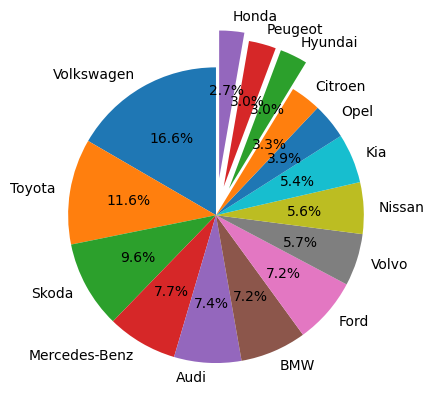

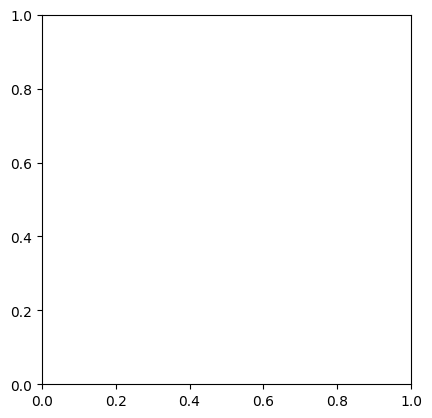

In [38]:


# Set the figure size
plt.figure(figsize=(15, 8))

# Create a pie chart with exploded slices
explode = (0, 0, 0, 0, 0, 0, 0, 0,0 ,0, 0, 0, 0.2, 0.2 ,0.25)  # Adjust the explode values as needed
# Create a pie chart
fig, ax = plt.subplots()
ax.pie(df["Määrä"], labels=df["Merkki"], autopct='%1.1f%%', startangle=90, explode=explode)

# Create a separate subplot for the exploded slice
fig_exploded, ax_exploded = plt.subplots()
ax_exploded.pie([0, df["Määrä"][:-3]], labels=['', df["Merkki"][:-3]], autopct='%1.1f%%', startangle=90)
ax_exploded.set_title('Exploded Slice')

# Adjust the position of subplots to separate them
plt.gcf().subplots_adjust(wspace=0.5)

# Show the plots
plt.show()

# Ostoskorianalyysi

In [4]:
# Import necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Sample data (replace this with your own dataset)
data = {
    'TransactionID': [1, 1, 2, 2, 2, 3, 3, 3, 3, 4],
    'Item': ['A', 'B', 'A', 'C', 'D', 'B', 'C', 'D', 'E', 'A']
}

df1 = pd.DataFrame(data)
df1

,TransactionID,Item
0,1,A
1,1,B
...,...,...
8,3,E
9,4,A


In [5]:


# Convert the data into a one-hot encoded matrix
basket = pd.crosstab(df.columns, dropna=False)

# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.2, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Display the results
print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules)


TypeError: crosstab() missing 1 required positional argument: 'columns'

In [ ]:
df = kk.rekisteroityjen_autojen_tiedot_aikavalilla(2015, 2016)
df

<connection object at 0x000001E3A713FCD0; dsn: 'user=postgres password=xxx dbname=VehicleRegisterDatabase host=192.168.0.15', closed: 0>
Cursor created successfully


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Load your dataset
# Assuming your dataset is stored in a DataFrame named 'df'
# Replace 'your_dataset.csv' with the actual path or filename
# df = pd.read_csv('your_dataset.csv')

# Drop unnecessary columns for this analysis (e.g., 'kunta' and 'matkamittarilukema')
df = df.drop(['ahdin', 'sahkohybridi', 'matkamittarilukema', 'vari', 'suurinnettoteho', 'sylintereidenlkm', 'vaihteistotyyppi', 'istumapaikkojenlkm', 'ohjaamotyyppi', 'vaihteidenlkm'], axis=1)
#print(df) # Ton sähköhybridin valuet vois myös muuttaa nii että true on sähkö nii ois helpompi tajuta sit tässä ostokorissa
# Convert categorical variables into dummy/indicator variables
df_encoded = pd.get_dummies(df, prefix='', prefix_sep='')

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display the frequent itemsets and association rules
print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules)


In [ ]:
frequent_itemsets.head(10)

In [ ]:
# Assuming 'frequent_itemsets' is your frequent itemsets DataFrame
larger_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) > 1)]
larger_itemsets = larger_itemsets.sort_values(by='support', ascending=False)

# Display the top frequent itemsets with more than one item
print(larger_itemsets.head(10))


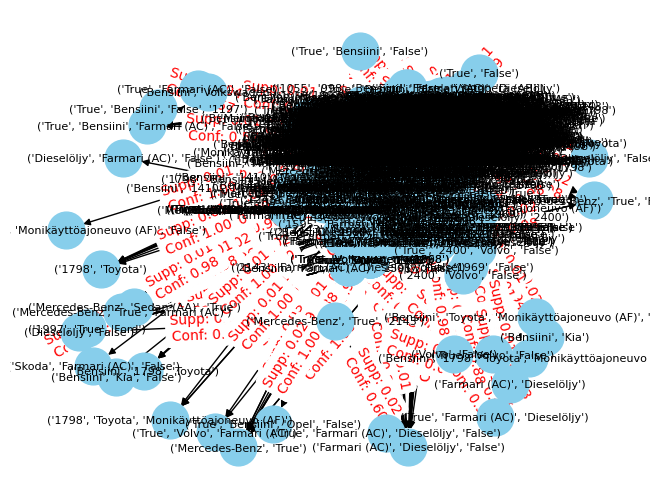

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming 'rules' is your association rules DataFrame
G = nx.DiGraph()

for _, row in rules.iterrows():
    G.add_edge(tuple(row['antecedents']), tuple(row['consequents']),
               support=row['support'], confidence=row['confidence'])

pos = nx.spring_layout(G)
labels = {(i, j): f"Supp: {d['support']:.2f}\nConf: {d['confidence']:.2f}" 
          for i, j, d in G.edges(data=True)}

nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red')
plt.show()


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming 'your_categorical_variable1' and 'your_categorical_variable2' are categorical variables
# Replace them with the actual column names from your dataset
crosstab = pd.crosstab(df['your_categorical_variable1'], df['your_categorical_variable2'])

# Perform chi-squared test for independence
chi2, p, _, _ = chi2_contingency(crosstab)

# Print the results
print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")


# Sekalaista

In [ ]:
df = pd.read_csv('Ajoneuvojen_avoin_data_5_21.csv', encoding='ISO-8859-1', on_bad_lines="skip", delimiter=";",low_memory=False)

Otetaan dataa 2010 luvulta eteenpäin

In [ ]:
df['ensirekisterointipvm'] = pd.to_datetime(df['ensirekisterointipvm'])
df = df[df['ensirekisterointipvm'] > '2010-01-01']

Otetaan pelkästään M1 ajoneuvoluokan arvot eli henkilöautot

In [ ]:
df = df[df['ajoneuvoluokka'] == 'M1']

In [ ]:
df

In [ ]:
value_counts_series = df['merkkiSelvakielinen'].dropna().value_counts()
values_to_keep = value_counts_series[value_counts_series > 30000].index
df = df[df['merkkiSelvakielinen'].isin(values_to_keep)]

In [ ]:
df['merkkiSelvakielinen'].dropna().nunique()

In [ ]:
df['merkkiSelvakielinen'].dropna().value_counts()

In [ ]:
plt.figure(figsize=(20, 8))
value_counts = df['merkkiSelvakielinen'].value_counts()
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Amount of registered vehicles for every brand with over 30 000 registered vehicles')
plt.show()

In [ ]:

brand_df = df[df['merkkiSelvakielinen'] == 'Volvo']
brand_df['Year'] = (brand_df['ensirekisterointipvm']).dt.year
brand_counts = brand_df.groupby('Year').size()
# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(brand_counts.index, brand_counts.values, marker='o', linestyle='-')
plt.title('First Registrations for Volvo per year')
plt.xlabel('Year')
plt.ylabel('Number of Registrations')
plt.grid(True)
plt.show()